In [42]:
import tensorflow as tf
# Files Processing
import pandas as pd
# data visulaization
import seaborn as sns
# data visulaization
import matplotlib.pyplot as plt

In [44]:
training_set = pd.read_csv('/Tensorflow/boston_train.csv')
testing_set = pd.read_csv('/Tensorflow/boston_test.csv')
prediction_set = pd.read_csv('/Tensorflow/boston_predict.csv')

In [45]:
training_set.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,2.30040,0.0,19.58,0.605,6.319,96.1,2.1000,403,14.7,23.8
1,13.35980,0.0,18.10,0.693,5.887,94.7,1.7821,666,20.2,12.7
2,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,233,17.9,26.6
3,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,305,19.2,21.7
4,0.03768,80.0,1.52,0.404,7.274,38.3,7.3090,329,12.6,34.6


In [46]:
training_set.corr()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
CRIM,1.000000,-0.197764,0.383433,0.407698,-0.219043,0.350003,-0.377643,0.563791,0.284306,-0.375836
ZN,-0.197764,1.000000,-0.532929,-0.521745,0.328418,-0.561062,0.665677,-0.323539,-0.393904,0.365931
INDUS,0.383433,-0.532929,1.000000,0.758157,-0.393738,0.644559,-0.717796,0.722435,0.386248,-0.465083
NOX,0.407698,-0.521745,0.758157,1.000000,-0.309519,0.735999,-0.776624,0.664923,0.185284,-0.410425
RM,-0.219043,0.328418,-0.393738,-0.309519,1.000000,-0.253271,0.211441,-0.302268,-0.395436,0.685041
AGE,0.350003,-0.561062,0.644559,0.735999,-0.253271,1.000000,-0.742486,0.521723,0.260205,-0.368922
DIS,-0.377643,0.665677,-0.717796,-0.776624,0.211441,-0.742486,1.000000,-0.555040,-0.227288,0.236714
TAX,0.563791,-0.323539,0.722435,0.664923,-0.302268,0.521723,-0.555040,1.000000,0.473023,-0.449570
PTRATIO,0.284306,-0.393904,0.386248,0.185284,-0.395436,0.260205,-0.227288,0.473023,1.000000,-0.531764
MEDV,-0.375836,0.365931,-0.465083,-0.410425,0.685041,-0.368922,0.236714,-0.449570,-0.531764,1.000000


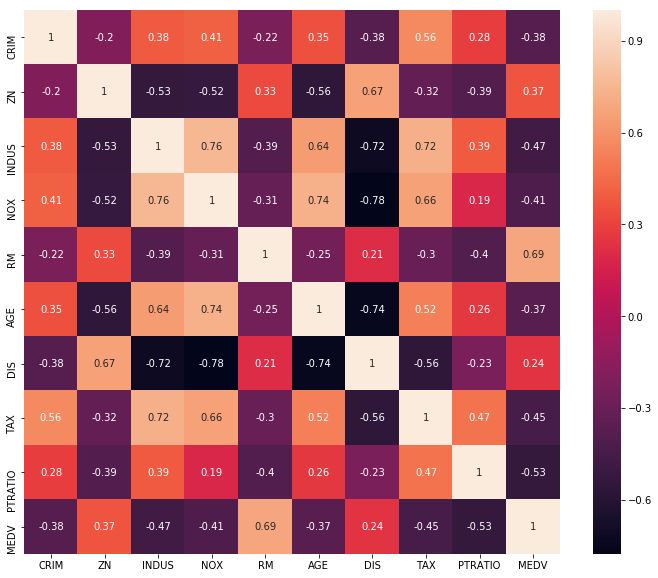

In [48]:
plt.figure(figsize=(12,10))
sns.heatmap(training_set.corr(), annot=True)

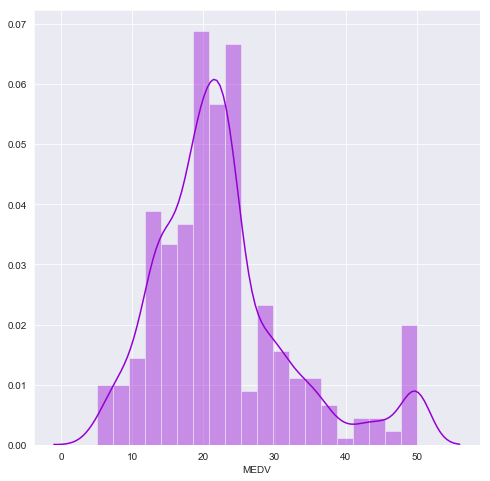

In [57]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
sns.distplot(training_set['MEDV'], color='darkviolet')

In [55]:
X_train = training_set.drop('MEDV', axis = 1)

In [58]:
Y_train = training_set['MEDV']

In [59]:
from tensorflow import keras
from tensorflow.keras import layers

In [85]:
def build_model():
    # Define the model - Sequential Model 
    # Activation function - ReLU, tf.nn.sigmoid
    model = keras.Sequential([
    layers.Dense(128, activation=tf.nn.relu, 
                 input_shape=[len(X_train.keys())]),
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(1)
  ])
    # Model Optimizer - To optimize loss function
    optimizer = tf.keras.optimizers.RMSprop(0.005)
    #optimizer = 'adam'
    model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 
                         'mean_squared_error'])
    return model

In [86]:
model = build_model()

In [87]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1280      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 67,329
Trainable params: 67,329
Non-trainable params: 0
_________________________________________________________________


In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
# Scale both the training inputs and outputs
scaled_train = scaler.fit_transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [89]:
scaled_train_df = pd.DataFrame(scaled_train, 
                               columns=['CRIM','ZN','INDUS','NOX','RM',
                                        'AGE','DIS','TAX','PTRATIO'])

In [90]:
EPOCHS = 50
## fit means training the dataset
history = model.fit(scaled_train_df,Y_train,
                    epochs=EPOCHS, validation_split = 0.2)

Train on 320 samples, validate on 80 samples
Epoch 1/50
320/320 [==============================] - 1s 2ms/sample - loss: 238.0057 - mean_absolute_error: 12.3178 - mean_squared_error: 238.0057 - val_loss: 217.5808 - val_mean_absolute_error: 12.4949 - val_mean_squared_error: 217.5808
Epoch 2/50
320/320 [==============================] - 0s 135us/sample - loss: 96.0439 - mean_absolute_error: 7.2900 - mean_squared_error: 96.0439 - val_loss: 49.3641 - val_mean_absolute_error: 5.1449 - val_mean_squared_error: 49.3641
Epoch 3/50
320/320 [==============================] - 0s 150us/sample - loss: 70.7459 - mean_absolute_error: 5.9986 - mean_squared_error: 70.7459 - val_loss: 44.9406 - val_mean_absolute_error: 4.7814 - val_mean_squared_error: 44.9406
Epoch 4/50
320/320 [==============================] - 0s 156us/sample - loss: 62.5634 - mean_absolute_error: 5.9856 - mean_squared_error: 62.5634 - val_loss: 100.1404 - val_mean_absolute_error: 8.1602 - val_mean_squared_error: 100.1404
Epoch 5/50
32

Epoch 36/50
320/320 [==============================] - 0s 237us/sample - loss: 29.3399 - mean_absolute_error: 3.6647 - mean_squared_error: 29.3399 - val_loss: 23.7550 - val_mean_absolute_error: 3.0191 - val_mean_squared_error: 23.7550
Epoch 37/50
320/320 [==============================] - 0s 162us/sample - loss: 39.0151 - mean_absolute_error: 4.3206 - mean_squared_error: 39.0151 - val_loss: 20.0878 - val_mean_absolute_error: 2.9330 - val_mean_squared_error: 20.0878
Epoch 38/50
320/320 [==============================] - 0s 168us/sample - loss: 32.1487 - mean_absolute_error: 3.7081 - mean_squared_error: 32.1487 - val_loss: 32.9668 - val_mean_absolute_error: 4.6152 - val_mean_squared_error: 32.9668
Epoch 39/50
320/320 [==============================] - 0s 149us/sample - loss: 31.5523 - mean_absolute_error: 3.7458 - mean_squared_error: 31.5523 - val_loss: 20.6013 - val_mean_absolute_error: 2.8844 - val_mean_squared_error: 20.6013
Epoch 40/50
320/320 [==============================] - 0s 40

In [92]:
X_test = testing_set.drop('MEDV', axis = 1)
Y_test = testing_set['MEDV']

In [93]:
scaled_test = scaler.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [94]:
scaled_train_df = pd.DataFrame(scaled_test, 
                               columns=['CRIM','ZN','INDUS','NOX','RM',
                                        'AGE','DIS','TAX','PTRATIO'])

In [95]:
# Prediction of  data from Neural Network
Y_test_pred = model.predict(scaled_train_df)

In [96]:
Y_test_pred

array([[17.954487 ],
       [28.6407   ],
       [17.664124 ],
       [28.952524 ],
       [33.828255 ],
       [21.753206 ],
       [21.24533  ],
       [18.457874 ],
       [29.143742 ],
       [16.931463 ],
       [22.620743 ],
       [15.816263 ],
       [18.068035 ],
       [54.294514 ],
       [10.394419 ],
       [14.227073 ],
       [30.620876 ],
       [17.285763 ],
       [24.16605  ],
       [16.17942  ],
       [11.375994 ],
       [17.422009 ],
       [22.5639   ],
       [ 9.672212 ],
       [13.963035 ],
       [17.294563 ],
       [27.310308 ],
       [35.330482 ],
       [18.899826 ],
       [19.300175 ],
       [19.833786 ],
       [17.365051 ],
       [26.85091  ],
       [29.88254  ],
       [33.79509  ],
       [20.40121  ],
       [17.0344   ],
       [42.044277 ],
       [21.682285 ],
       [20.665386 ],
       [17.266117 ],
       [22.597015 ],
       [15.717772 ],
       [18.43441  ],
       [ 9.506056 ],
       [11.989411 ],
       [12.51099  ],
       [17.90

In [97]:
# Mean Sqaured Error
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(Y_test,Y_test_pred)
print(MSE)

16.159686182707443
